In [1]:
from cmb_simulation import *

In [2]:
powers = getCambSpectra(lmax=9000)

# Spectrum sampling

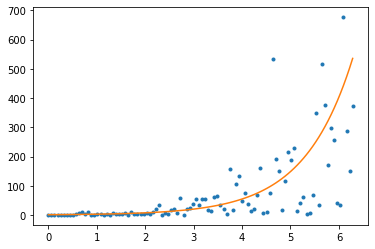

In [8]:
# Spctrum.sample
spec = Spectrum(np.exp)
ls = np.linspace(0, 2*np.pi, 100)
samples = spec.sample(ls)

plt.plot(ls, (samples*samples.conj()).real, '.')
plt.plot(ls, spec(ls))
plt.show()
# validate: dots scatter around orange line

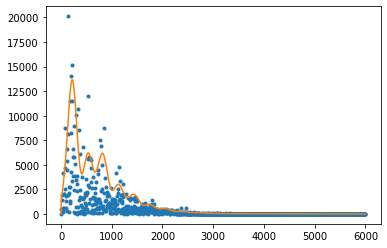

In [21]:
# sampleCov, CMBSpectra.choleskyUnlensed
specs = CMBSpectra(powers)
ls = np.linspace(0, 6000, 1000)
chol = specs.choleskyUnlensed(ls)
samples = sampleCov(chol)

plt.plot(ls, (samples[:,0]*samples[:,0].conj()).real * ls**2 / (2*np.pi), '.')
specs.TT.plot(ls, scale=lambda l: l**2 / np.sqrt(2*np.pi))
plt.show()
# validate: dots scatter around orange line

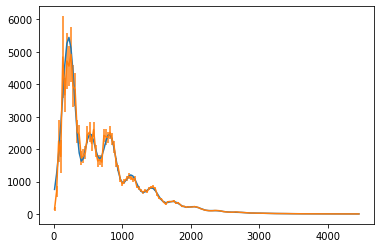

In [22]:
# CMBSpectra.generatePrimordialMaps, Averager.bin
specs = CMBSpectra(powers)
TEB_prim, p_prim = specs.generatePrimordialMaps(0.001, 256)

binned_T = TEB_prim.T.binSpectrum(delta=30)
specs.TT.plot(binned_T.ls, scale=lambda l: l**2/(2*np.pi))
binned_T.plot(scale=lambda l: l**2/(2*np.pi))
plt.show()
# validate: points match curve

In [23]:
# T anisotropy
specs = CMBSpectra(powers)
TEB_prim, p_prim = specs.generatePrimordialMaps(0.001, 256)
np.sqrt(np.mean(TEB_prim.T.r**2))
# validate: ~100 (muK)

96.78266989324402